In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import netCDF4

In [4]:
nc = netCDF4.Dataset('/artemis/adc/cooldown_logs/2015-01-13_13-40-50.nc')

In [16]:
va = nc.groups['cryomech'].variables

In [17]:
va.keys()

[u'min_temp_helium',
 u'batt_ok',
 u'min_pressure_high',
 u'avg_pressure_high',
 u'max_temp_oil',
 u'comp_minutes',
 u'max_pressure_low',
 u'pressure_high',
 u'min_pressure_low',
 u'avg_pressure_delta',
 u'comp_on',
 u'max_temp_water_in',
 u'max_temp_helium',
 u'temp_water_out',
 u'min_temp_water_out',
 u'temp_oil',
 u'max_pressure_high',
 u'pressure_error',
 u'temp_water_in',
 u'min_temp_oil',
 u'batt_low',
 u'pressure_high_deriv',
 u'pressure_low',
 u'min_temp_water_in',
 u'error_code',
 u'cpu_temp',
 u'avg_pressure_low',
 u'max_temp_water_out',
 u'temp_helium',
 u'time',
 u'temp_error',
 u'motor_current']

In [26]:
import pandas as pd

In [42]:
def nc_to_df(fn):
    try:
        nc = netCDF4.Dataset(fn)
        cryo = nc.groups['cryomech'].variables
        data_dict = {}
        for key in ['time','temp_oil','temp_water_in','temp_water_out','motor_current','cpu_temp']:
            data_dict[key] = cryo[key][::60]
        df = pd.DataFrame(data_dict)
        print fn,df.shape
    except Exception, e:
        print fn,e
        df = None
    finally:
        nc.close()
    return df

In [35]:
df = nc_to_df('/artemis/adc/cooldown_logs/2015-01-15_12-58-41.nc')

In [36]:
df.shape

(87, 6)

In [37]:
import joblib

In [38]:
pp = joblib.Parallel(n_jobs=20,verbose=5)

In [40]:
import glob

In [41]:
ncfiles=glob.glob('/artemis/adc/cooldown_logs/2015*.nc')
ncfiles.sort()
print len(ncfiles)

45


In [ ]:
dfs = pp(joblib.delayed(nc_to_df)(x) for x in ncfiles)

In [32]:
t = va['time'][::60]

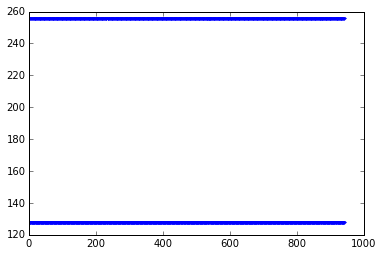

In [33]:
plot(np.diff(t),'.')

In [24]:
h20in = nc.groups['cryomech'].variables['temp_water_in'][::60]
h20out = nc.groups['cryomech'].variables['temp_water_out'][::60]
oil = va['temp_oil'][::60]
current = va['motor_current'][::60]
pressure_low = va['pressure_low'][::60]

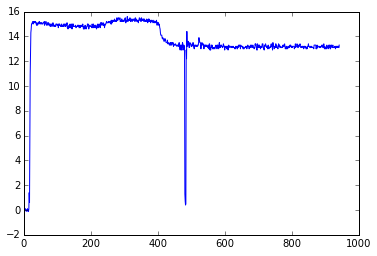

In [15]:
#plot(h20in)
plot(h20out-h20in)

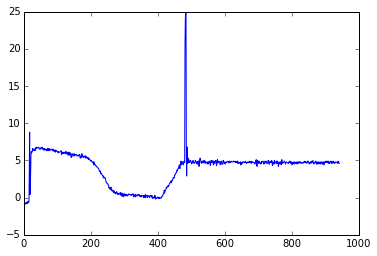

In [21]:
plot(oil-h20out)

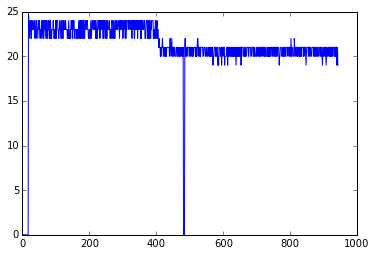

In [23]:
plot(current)

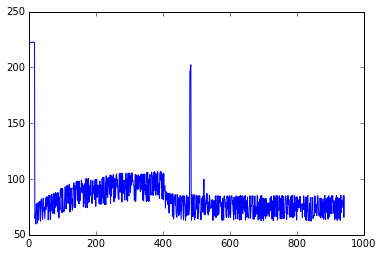

In [25]:
plot(pressure_low)